In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [2]:
#Read the array.
def read_model(dust_model, fw=True, bw=True):
    suffix = ""
    if fw:
        suffix += "FW"
    if bw:
        suffix += "BW"
    fname = "{}.hires.{}.txt".format(dust_model, suffix)
    print(fname)
    waves = np.loadtxt(fname, max_rows=1)
    theta = np.loadtxt(fname, max_rows=1, skiprows=1)
    psi  = np.loadtxt(fname, max_rows=1, skiprows=2)
    data = np.loadtxt(fname, skiprows=3)
    p = data.reshape([len(waves), len(theta), len(psi)])

    return waves, theta, psi, p

SMC.hires.FWBW.txt


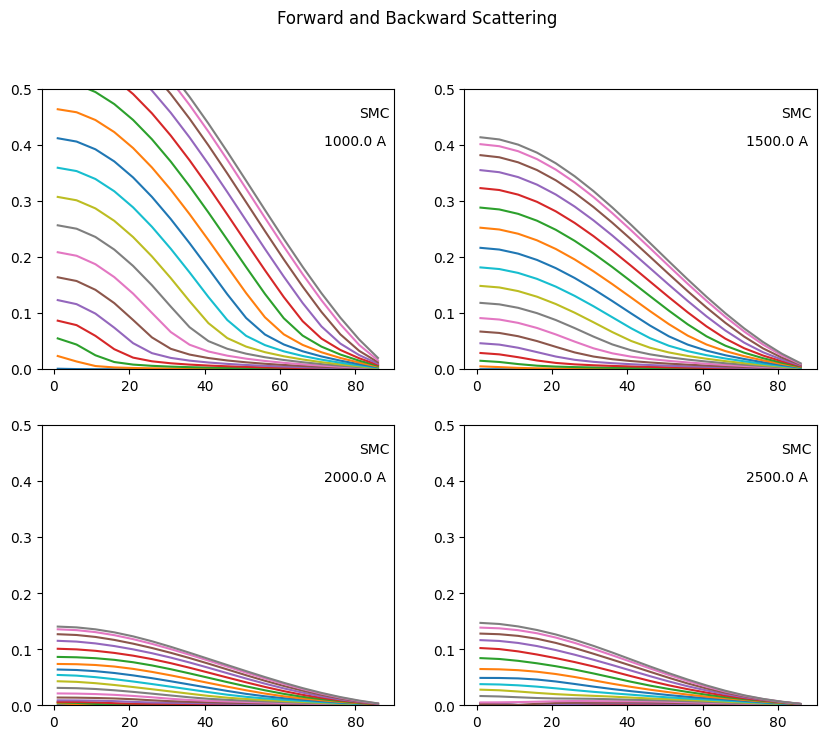

In [3]:
lam_targs = [1000., 1500., 2000., 2500.]
for dust_model in ["SMC"]:#,"LMC","MW"]:
    waves, theta, psi, p = read_model(dust_model)
    fig, axs = plt.subplots(2,2,figsize=(10,8))
    for i, lam_targ in enumerate(lam_targs):
        ax = axs[int(i/2),i-int(i/2)*2]
        k = np.argmin(np.abs(lam_targ-waves))
        for j in range(len(theta)):
            ax.plot(psi, np.abs(p[k,j]))
        ax.set_ylim([0,0.5])
        ax.text(0.9,0.9,dust_model,transform=ax.transAxes)
        ax.text(0.8,0.8,"{} A".format(waves[k]), transform=ax.transAxes)
    fig.suptitle("Forward and Backward Scattering")
    plt.show()

SMC.hires.FW.txt


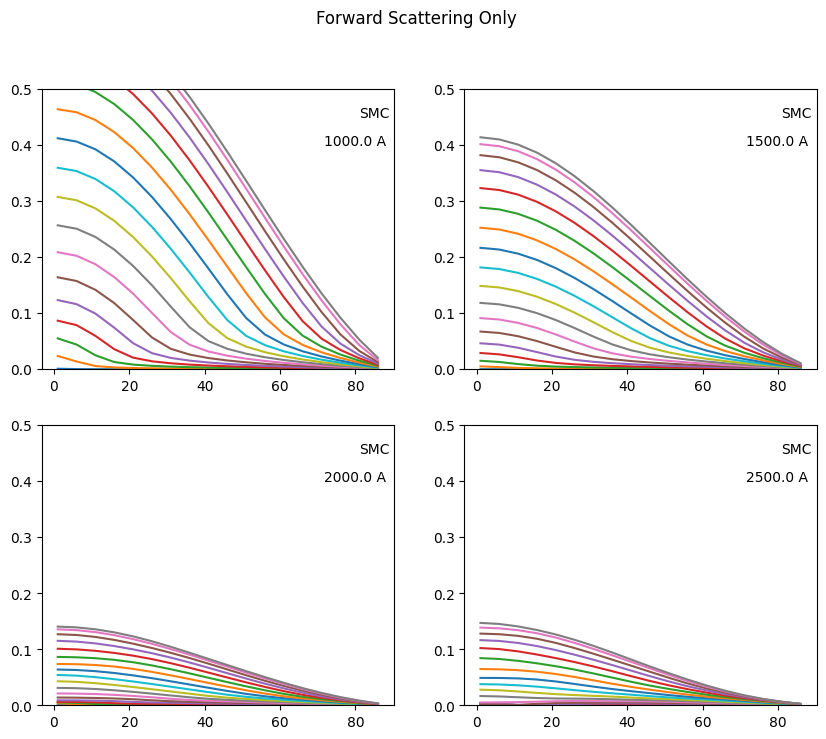

In [4]:
fw = True
bw = False
lam_targs = [1000., 1500., 2000., 2500.]
for dust_model in ["SMC"]:#,"LMC","MW"]:
    waves, theta, psi, p = read_model(dust_model, fw=fw, bw=bw)
    fig, axs = plt.subplots(2,2,figsize=(10,8))
    for i, lam_targ in enumerate(lam_targs):
        ax = axs[int(i/2),i-int(i/2)*2]
        k = np.argmin(np.abs(lam_targ-waves))
        for j in range(len(theta)):
            ax.plot(psi, np.abs(p[k,j]))
        ax.set_ylim([0,0.5])
        ax.text(0.9,0.9,dust_model,transform=ax.transAxes)
        ax.text(0.8,0.8,"{} A".format(waves[k]), transform=ax.transAxes)
    fig.suptitle("Forward Scattering Only")
    plt.show()

SMC.hires.BW.txt


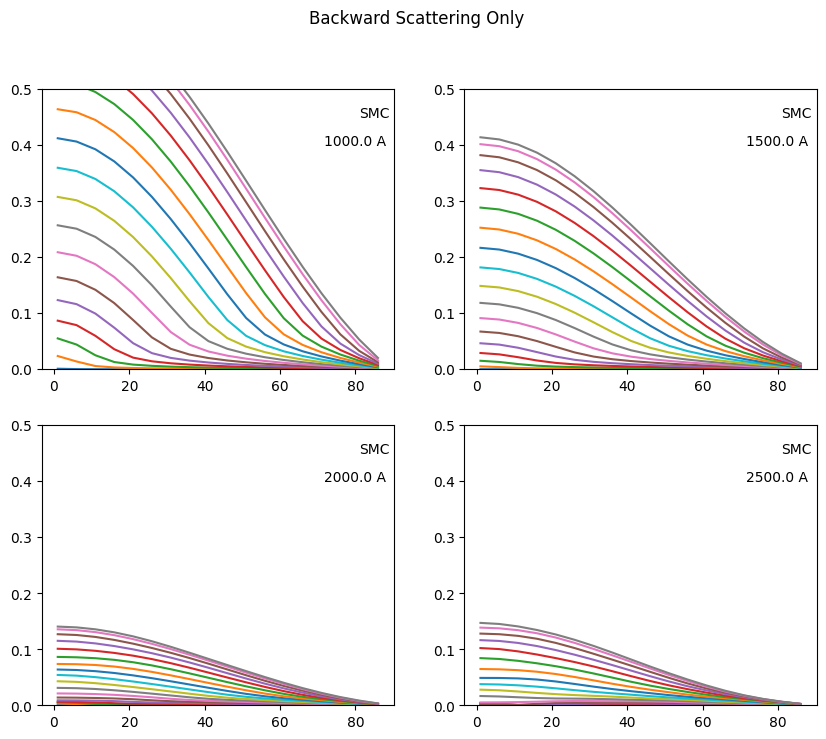

In [5]:
fw = False
bw = True
lam_targs = [1000., 1500., 2000., 2500.]
for dust_model in ["SMC"]:#,"LMC","MW"]:
    waves, theta, psi, p = read_model(dust_model, fw=fw, bw=bw)
    fig, axs = plt.subplots(2,2,figsize=(10,8))
    for i, lam_targ in enumerate(lam_targs):
        ax = axs[int(i/2),i-int(i/2)*2]
        k = np.argmin(np.abs(lam_targ-waves))
        for j in range(len(theta)):
            ax.plot(psi, np.abs(p[k,j]))
        ax.set_ylim([0,0.5])
        ax.text(0.9,0.9,dust_model,transform=ax.transAxes)
        ax.text(0.8,0.8,"{} A".format(waves[k]), transform=ax.transAxes)
    fig.suptitle("Backward Scattering Only")
    plt.show()